In [1]:
from __future__ import division
from covertrace.data_array import Sites
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import abspath, dirname, join
%matplotlib inline

In [2]:
from covertrace import ops_filter
from covertrace import ops_plotter
from covertrace import ops_bool

In [6]:
data_folder = join(dirname(dirname(abspath(os.curdir))), 'data')

In [7]:
print data_folder

/Users/kudo/ktr_protocol/covertrace/data


In [8]:
parent_folder = join(data_folder, 'AnisoInh')
sub_folders = ['Pos001', 'Pos002']
conditions = ['AnisoInh', 'AnisoInh']
sites = Sites(parent_folder, sub_folders, conditions, file_name='df.npz')

In [9]:
site = sites.Pos001

In [10]:
print site.name
print site.condition
print site.directory
print site.file_name

Pos001
AnisoInh
/Users/kudo/ktr_protocol/covertrace/data/AnisoInh/Pos001
df.npz


When you access to save.data, it will read site.directory + site.file_name as a DataHolder object and store it in staged.data_holder untill you access to a different site.

In [7]:
site.data

In [8]:
print site.data.labels

[('prop',), ('cytoplasm', 'DAPI', 'area'), ('cytoplasm', 'DAPI', 'convex_area'), ('cytoplasm', 'DAPI', 'cv_intensity'), ('cytoplasm', 'DAPI', 'eccentricity'), ('cytoplasm', 'DAPI', 'label_id'), ('cytoplasm', 'DAPI', 'major_axis_length'), ('cytoplasm', 'DAPI', 'max_intensity'), ('cytoplasm', 'DAPI', 'mean_intensity'), ('cytoplasm', 'DAPI', 'median_intensity'), ('cytoplasm', 'DAPI', 'median_ratio'), ('cytoplasm', 'DAPI', 'min_intensity'), ('cytoplasm', 'DAPI', 'minor_axis_length'), ('cytoplasm', 'DAPI', 'parent_id'), ('cytoplasm', 'DAPI', 'perimeter'), ('cytoplasm', 'DAPI', 'solidity'), ('cytoplasm', 'DAPI', 'std_intensity'), ('cytoplasm', 'DAPI', 'total_intensity'), ('cytoplasm', 'DAPI', 'x'), ('cytoplasm', 'DAPI', 'y'), ('cytoplasm', 'YFP', 'area'), ('cytoplasm', 'YFP', 'convex_area'), ('cytoplasm', 'YFP', 'cv_intensity'), ('cytoplasm', 'YFP', 'eccentricity'), ('cytoplasm', 'YFP', 'label_id'), ('cytoplasm', 'YFP', 'major_axis_length'), ('cytoplasm', 'YFP', 'max_intensity'), ('cytoplasm

This site has 77 labels (e.g. ['cytoplasm', 'DAPI', 'area']), 78 cells, 40 frames

In [9]:
site.data.arr.shape

(77, 78, 40)

You can access to 2D data like a dictionary.

In [10]:
site.data['cytoplasm', 'DAPI', 'area'].shape

(78, 40)

May not use that much but you can also access to 3D array like this.

In [11]:
site.data['nuclei'].shape

(38, 78, 40)

In [12]:
site.data['cytoplasm', 'DAPI'].shape

(19, 78, 40)

If you want to make a change to data, *site.save* after.

In [13]:
site.data[('cytoplasm', 'DAPI', 'max_intensity')][2, 1:5] = 1000 # Don't ask why we do this

In [14]:
site.save()

Pos001: file_name is updated to arr_modified.npz


You can also supply a new array.

In [15]:
sample_arr = site.data.arr.copy()
sample_arr[2, :, :] = np.zeros(sample_arr[2, :, :].shape)
site.save(arr=sample_arr)

Pos001: file_name is updated to arr_modified.npz


In [16]:
print site.data.arr[2, :, :]

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


sites is iterable.

In [17]:
for site in sites:
    print site.data['cytoplasm', 'DAPI', 'area'].shape

(78, 40)
(86, 40)


In [18]:
for site in sites:
    site.data[('cytoplasm', 'DAPI', 'max_intensity')][2, 1:5] = 1000 # Don't ask why we do this
    site.save()

Pos002: file_name is updated to arr_modified.npz


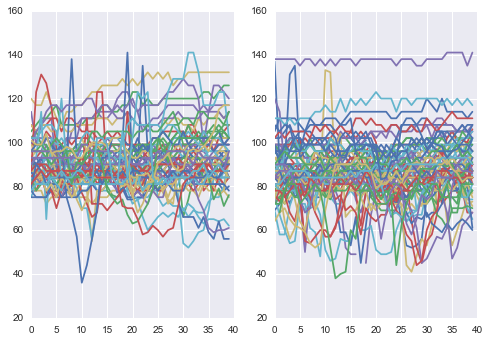

In [19]:
for num, site in enumerate(sites):
    plt.subplot(1, 2, num+1)
    plt.plot(site.data['cytoplasm', 'DAPI', 'area'].T)

*state* is to supply you a convinent way to access to the 2D array you are interested in to play with. 

In [20]:
site._set_state(['cytoplasm', 'DAPI', 'area'])
print site._state
print site.data.slice_arr.shape

['cytoplasm', 'DAPI', 'area']
(86, 40)


In [21]:
sites.set_state(['cytoplasm', 'DAPI', 'area'])

In [22]:
for site in sites:
    print site.data.slice_arr.shape

(78, 40)
(86, 40)


After you set a state, site.data.slice_arr will return you the data['cytoplasm', 'DAPI', 'area'].

In [23]:
sites.Pos001.data.slice_arr.shape

(78, 40)

What sites.iterate will do is to take a function generated by partial, and iterate them over each site.data.slice_arr.

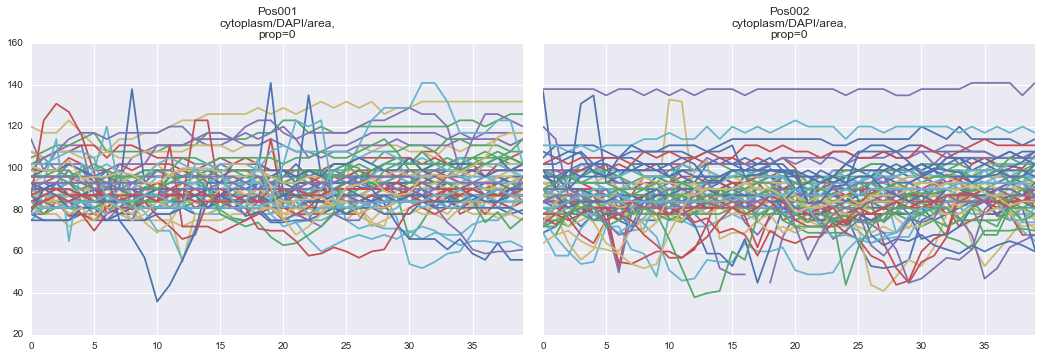

In [24]:
plot_all = partial(ops_plotter.plot_all)
fig, axes = sites.iterate(plot_all)

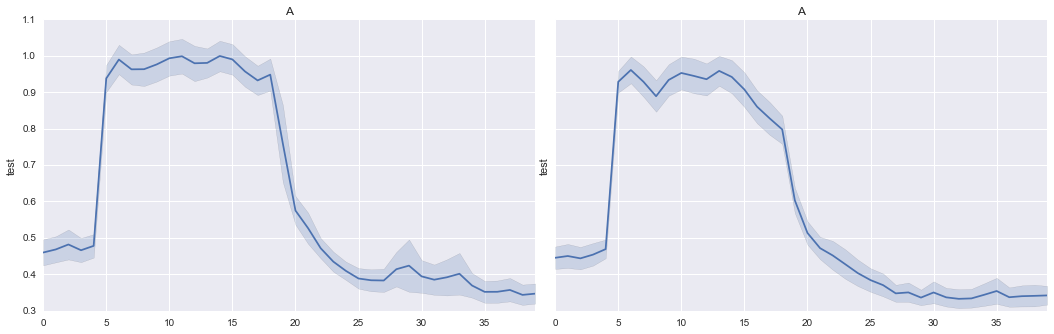

In [25]:
sites.set_state(['cytoplasm', 'YFP', 'median_ratio'])
plot_tsplot = partial(ops_plotter.plot_tsplot)
fig, axes = sites.iterate(plot_tsplot)
for ax in axes:
    ax.set_title('A')
    ax.set_ylabel('test')

Functions in ops_bool is to assign the property ID to cells. 

In [26]:
ops_bool.filter_frames_by_range?

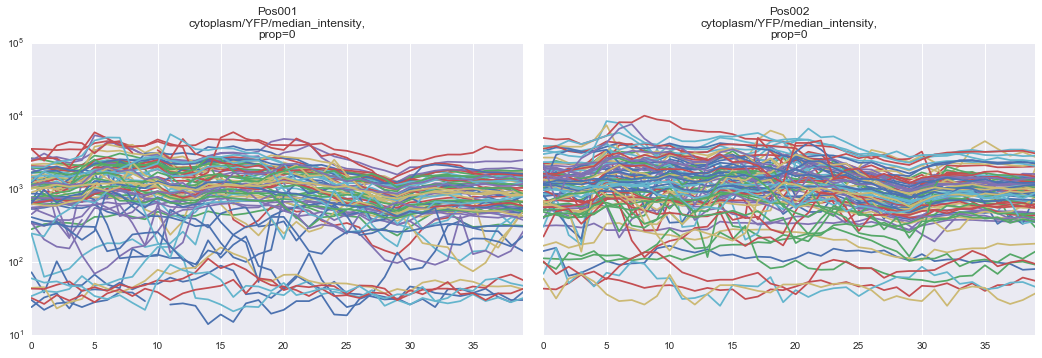

In [27]:
sites.set_state(['cytoplasm', 'YFP', 'median_intensity'])
plot_all_log = partial(ops_plotter.plot_all, logy=True)
fig, axes = sites.iterate(plot_all_log)

Let's say we want to first see the median_ratio of cells with median_intensity lower than 100. First assign propid=1 to those cells.

In [28]:
ops = partial(ops_bool.filter_frames_by_range, LOWER=100)
sites.iterate(ops, 1)

Pos002: file_name is updated to arr_modified.npz


For positions where cytoplasmic YFP median_intensity is lower than 100, prop is now assigned 1. 

In [29]:
print sites.Pos001.data['cytoplasm', 'YFP', 'median_intensity']
print sites.Pos001.data.prop  # cells with 

[[   30.     22.     27.  ...,    37.     30.     30. ]
 [  281.    330.    349.  ...,   326.    320.    313. ]
 [ 1243.   1112.   1160.  ...,   792.5   783.      nan]
 ..., 
 [ 1108.5  1226.   1191.  ...,  1394.5  1532.   1255. ]
 [ 1019.   1049.   1145.  ...,   898.    802.    827. ]
 [   59.5    52.     54.  ...,    59.5    51.     47. ]]
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


In [30]:
sites.propagate_prop(pid=1)  # propagate propid=1 to all the time frames

Pos002: file_name is updated to arr_modified.npz


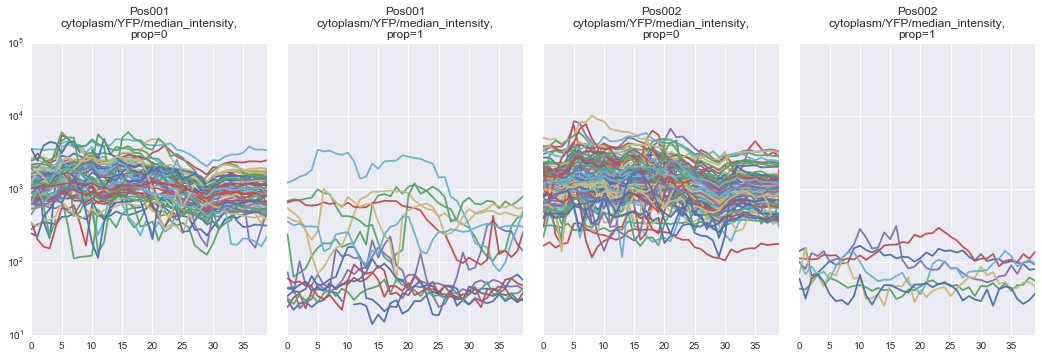

In [31]:
sites.set_state(['cytoplasm', 'YFP', 'median_intensity'])
plot_all_log = partial(ops_plotter.plot_all, logy=True)
fig, axes = sites.iterate(plot_all_log)

You can now see the plots give you visualization for prop=0 and prop=1 as well. prop=1 has some frame with median_intensity lower than 100.  
You can also take a look at other labels, like median_ratio.

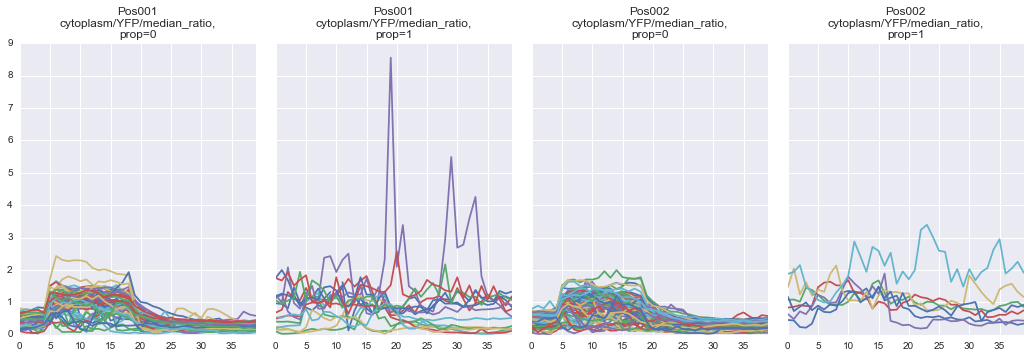

In [32]:
sites.set_state(['cytoplasm', 'YFP', 'median_ratio'])
plot_all = partial(ops_plotter.plot_all)
fig, axes = sites.iterate(plot_all)

You see cells with prop=1 are much noisier. Let's remove these cells.

In [33]:
sites.drop_prop(pid=1)

Pos002: file_name is updated to arr_modified.npz


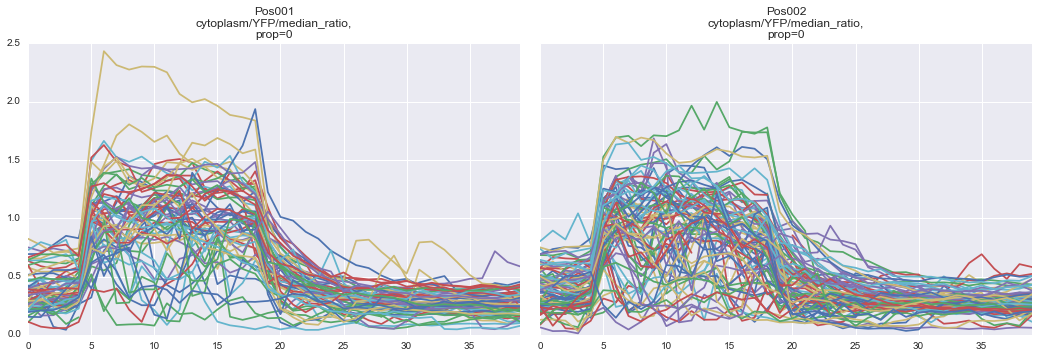

In [34]:
sites.set_state(['cytoplasm', 'YFP', 'median_ratio'])
plot_all = partial(ops_plotter.plot_all)
fig, axes = sites.iterate(plot_all)

In [35]:
sites.merge_conditions()

Pos001: file_name is updated to arr_modified.npz


`sites.merge_conditions()` merge all the positions with the same conditions.

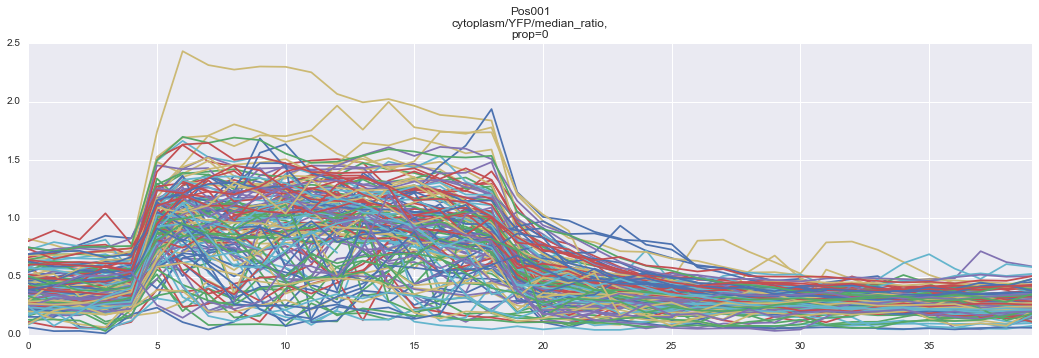

In [36]:
fig, axes = sites.iterate(plot_all)

Finally, let's try to increase the label (add one more data slice)

In [37]:
sam1 = np.zeros((site.data.arr.shape[0]+1, site.data.arr.shape[1], site.data.arr.shape[2]))
sam1[:-1, :, :] = site.data.arr
sam1[-1, :, :] = site.data['cytoplasm', 'YFP', 'mean_intensity']/site.data['nuclei', 'YFP', 'mean_intensity'] # add a new data at the end of the array

In [38]:
new_labels = site.data.labels
new_labels.append(('cytoplasm', 'YFP', 'mean_ratio'))
print new_labels[-3:] # new_label for the new data

[('nuclei', 'YFP', 'x'), ('nuclei', 'YFP', 'y'), ('cytoplasm', 'YFP', 'mean_ratio')]


In [39]:
site.save(arr=sam1, labels=new_labels)

Pos002: file_name is updated to arr_modified.npz


In [40]:
print site.data['cytoplasm', 'YFP', 'mean_ratio']  # new label added.

[[ 0.51423936  0.58904485  0.52576951 ...,  0.36036765  0.3805786
   0.3916287 ]
 [ 0.69559651  0.70959896  0.70499989 ...,  0.46662107  0.4552877
   0.44479249]
 [ 0.23752606  0.26109487  0.26067361 ...,  0.51055478  0.54763429
   0.53884157]
 ..., 
 [ 0.50277119  0.465926    0.47392871 ...,  0.31459097  0.32633642
   0.33483836]
 [ 0.61217202  0.63484854  0.60155812 ...,  0.39131286  0.41168199
   0.4170568 ]
 [        nan  0.61968731  0.68722601 ...,  0.2097724   0.19148078
   0.20233192]]
